1). Fit a regression based supervised learning model for a data set and do the required optimization for learning the parameters of your model in the fol- lowing two different ways.

a) Optimization through Normal equations Method.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
import sklearn.datasets
from sklearn.model_selection import train_test_split
diabetes = sklearn.datasets.load_diabetes()
data = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
data = pd.get_dummies(data,drop_first=True)
data['output']=diabetes.target
data = data.dropna()
X = data.drop('output',axis=1)
Y = data['output']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.15,random_state=1)

In [0]:
X.head()
Y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: output, dtype: float64

In [0]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(375, 10)
(67, 10)
(375,)
(67,)


In [0]:
#x_train['BIAS'] = np.ones((x_train.shape[0],1))
X2 = np.array(x_train)
Transpose = np.dot(X2.T,X2)
Inverse = np.linalg.inv(Transpose)
J = np.dot(X2.T,y_train)
W = np.dot(Inverse,J)


In [0]:
print(W)

[-112.76584175 -269.59528943  636.53315199  288.95624382 -304.93125658
    7.56030324   30.67295631  331.40658101  470.92327672  176.62876009]


b) Optimization through Gradient-descent Method.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files 
uploaded=files.upload()


Saving weight-height.csv to weight-height.csv


In [0]:
data = pd.read_csv("weight-height.csv")
print(data.shape)
data.head()

(10000, 3)


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [0]:
Height = data['Height'].values
Weight= data['Weight'].values



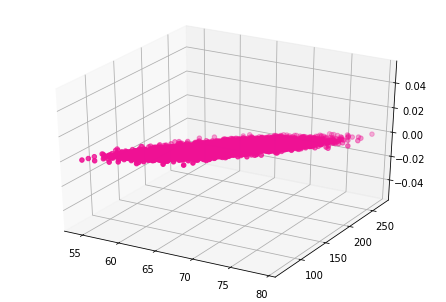

In [0]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(Height,Weight,color='#ef1194')
plt.show()

In [0]:
m = len(Height)
x0 = np.ones(m)
X = np.array([x0, Height, Weight]).T
# Initial Coefficients
W = np.array([0, 0, 0])
Y = np.array(Weight)
alpha = 0.0001

In [0]:
def cost_function(X, Y, W):
    m = len(Y)
    J = np.sum((X.dot(W) - Y) ** 2)/(2 * m)
    return J
inital_cost = cost_function(X, Y, W)
print(inital_cost)
def gradient_descent(X, Y, W, alpha, iterations):
    old_cost = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        h = X.dot(W)
        loss = h - Y
        gradient = X.T.dot(loss) / m
        W = W - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, W)
        old_cost[iteration] = cost
        
    return W, old_cost
new_W, old_cost = gradient_descent(X, Y, W, alpha, 10)
print(new_W)
#print(old_cost)


13546.918787280785
[  -10.54982977  -706.89717598 -1763.46636538]


2.Without using any library function, Implement a linear regression model which optimizes the parameters through the method of normal equations.

In [0]:
X2 = np.array(x_train)
Transpose = np.dot(X2.T,X2)
Inverse = np.linalg.inv(Transpose)
J = np.dot(X2.T,y_train)
W = np.dot(Inverse,J)

In [0]:
print(W)

[-112.76584175 -269.59528943  636.53315199  288.95624382 -304.93125658
    7.56030324   30.67295631  331.40658101  470.92327672  176.62876009]


3). 'Size of the data used to train a linear regression model is directly propor- tional to the performance of the model’. Take a data set with different sizes, and do a minimum of 10 experiments and produce a scatter-plot (size of the data Vs Performance of the model) and comment on the above statement, based on your experiment.

In [0]:
m = len(Height)
x0 = np.ones(m)
X = np.array([x0, Height, Weight]).T
# Initial Coefficients
W = np.array([0, 0, 0])
Y = np.array(Height)
alpha = 0.01

In [0]:
def cost_function(X, Y, W):
    m = len(Y)
    J = np.sum((X.dot(W) - Y) ** 2)/(2 * m)
    return J
inital_cost = cost_function(X, Y, W)
print(inital_cost)
def gradient_descent(X, Y, W, alpha, iterations):
    old_cost = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        h = X.dot(W)
        loss = h - Y
        gradient = X.T.dot(loss) / m
        W = W - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, W)
        old_cost[iteration] = cost
        
    return W, old_cost
new_W, old_cost = gradient_descent(X, Y, W, alpha, 10)
print(new_W)
#print(old_cost)


2209.727490051323
[-1.88558081e+22 -1.26346294e+24 -3.15204353e+24]


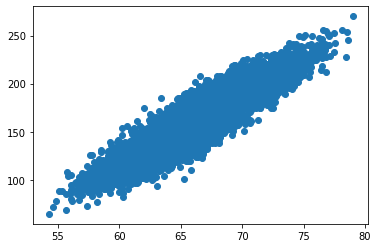

In [0]:
plt.scatter(Height,Weight)

4).Do a minimum of 50 experiments with the same data set for the linear re- gression model, by varying the learning rate (α) and compute the minimum number of iterations (ni) required for the convergence of the parameters involved in the learning model. With the data generated by through your experiments (learning rate, Minimum number of iterations for the conver- gence), Fit a learning model for that data to bring out the relationship between α and ‘ni’, in two different ways, first by taking α as the indepen- dent variable and then by taking ni as the independent variable an conclude whether the two models remain the same or not.

In [0]:
a = 2 * np.random.rand(100,1)
b = 4 +3 * a+np.random.randn(100,1)

In [0]:
a_b = np.c_[np.ones((100,1)),a]
theta_best = np.linalg.inv(a_b.T.dot(a_b)).dot(a_b.T).dot(b)
print(theta_best)

[[3.60011376]
 [3.1628249 ]]


In [0]:
a_new = np.array([[0],[2]])
a_new_b = np.c_[np.ones((2,1)),a_new]
b_predict = a_new_b.dot(theta_best)
b_predict

array([[3.60011376],
       [9.92576355]])

In [0]:
def cost_function(theta,a,b):
    m=len(b)
    predicted=a.dot(theta)
    cost=(1/2*m)*np.sum(np.square(predicted-b))
    return cost

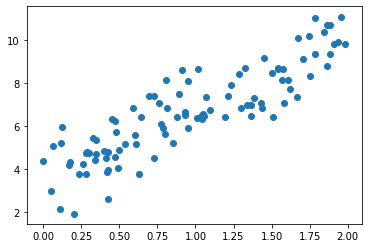

In [0]:
plt.scatter(a,b)

In [0]:
gd = GradDesc()
X1 = np.array(train_x)
Y1 = np.array(train_y)
gd.fit(X=X1,Y=Y1,epochs=3000,learning_rate=0.0001)

for i in range(50):
  epochs = 200 + i*50
  gd.fit(X=X1,Y=Y1,epochs=epochs,learning_rate=0.000001)

for i in range(50):
  learning_rate = 0.001/(i+1)
  gd.fit(X=X1,Y=Y1,epochs=5000,learning_rate=learning_rate)

for i in range(50):
  epochs = 9000 + i*800
  learning_rate = 0.000000001/(i+1)
  gd.fit(X=X1,Y=Y1,epochs=epochs,learning_rate=learning_rate)

In [0]:
alpha =0.01
epoch = 1000

theta = np.random.randn(2,1)

a_b = np.c_[np.ones((len(a),1)),a]
theta,cost_history,theta_history = gradient_desc(a_b,b,theta,alpha,epoch)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

In [0]:
ig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(epoch),cost_history,'b.')

5).Takeadataset.Fitalinearregression modelwith three different hypothesis
that involves differentdegreesofpolynomialsofthecomponentsoftheinput
vector.Conclude which ts the given data set best.


In [0]:
#Power of 2

class GradientDesc:
  def __init__(self):
    self.w = None
    self.b = None

  def perceptron(self,x):
    w1 = self.w**2
    return np.dot(x,w1.T) + self.b

  def grad_w(self,x,y):
    y_pred = self.perceptron(x)
    return 2*(y_pred - y)*x*self.w

  def grad_b(self,x,y):
    y_pred = self.perceptron(x)
    return (y_pred - y)

  def fit(self,X,Y,epochs=1,learning_rate=1,initialise=True,display_loss=True):

    if initialise:
      self.w  = np.ones((1,X.shape[1]))
      self.b = 0

    if display_loss:
      loss={}
    m = X.shape[0]
    for i in tqdm_notebook(range(epochs),total=epochs,unit="epoch"):
      dw = 0
      db = 0
      for x,y in zip(X,Y):
        dw += self.grad_w(x,y)
        db += self.grad_b(x,y)
      self.w -= (learning_rate*dw)/m
      self.b -= (learning_rate*db)/m
      if display_loss:
        Y_pred = self.perceptron(X)
        error = mean_squared_error(Y_pred,Y)
        loss[i]= error
    
    if display_loss:
      plt.plot(list(loss.values()))
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      print("Updated weights: ",self.w)
      print("Updated bias: ",self.b)
    return error
  def predict(self,X):
    Y_pred = []
    for x in X:
      y_pred = self.perceptron(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)  

In [0]:
G = GradientDesc()
X1 = np.array(train_x)
Y1 = np.array(train_y)
G.fit(X=X1,Y=Y1,epochs=500,learning_rate=0.01)

In [0]:
# Power of 3
class GradientDescent1:
  def __init__(self):
    self.w = None
    self.b = None

  def perceptron(self,x):
    w1 = self.w**3
    return np.dot(x,w1.T) + self.b

  def grad_w(self,x,y):
    y_pred = self.perceptron(x)
    return 3*(y_pred - y)*x*(self.w**2)

  def grad_b(self,x,y):
    y_pred = self.perceptron(x)
    return (y_pred - y)

  def fit(self,X,Y,epochs=1,learning_rate=1,initialise=True,display_loss=True):

    if initialise:
      self.w  = np.ones((1,X.shape[1]))
      self.b = 0

    if display_loss:
      loss={}
    m = X.shape[0]
    for i in tqdm_notebook(range(epochs),total=epochs,unit="epoch"):
      dw = 0
      db = 0
      for x,y in zip(X,Y):
        dw += self.grad_w(x,y)
        db += self.grad_b(x,y)
      self.w -= (learning_rate*dw)/m
      self.b -= (learning_rate*db)/m
      if display_loss:
        Y_pred = self.perceptron(X)
        error = mean_squared_error(Y_pred,Y)
        loss[i]= error
    
    if display_loss:
      plt.plot(list(loss.values()))
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      print("Updated weights: ",self.w)
      print("Updated bias: ",self.b)
    return error
  def predict(self,X):
    Y_pred = []
    for x in X:
      y_pred = self.perceptron(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)  

In [0]:
G = GradientDescent1()
X1 = np.array(x_train)
Y1 = np.array(y_train)
G.fit(X=X1,Y=Y1,epochs=5000,learning_rate=0.000001)

6.Take a data set, fit a non-linear model and a linear model for the same data. Based on your observations, conclude which model suits best for the chosen data set.

In [0]:
class GradientDescent2:
  def __init__(self):
    self.w = None
    self.b = None

  def perceptron(self,x):
    return np.dot(x**2,self.w.T) + self.b

  def grad_w(self,x,y):
    y_pred = self.perceptron(x)
    return (y_pred - y)*(x**2)

  def grad_b(self,x,y):
    y_pred = self.perceptron(x)
    return (y_pred - y)

  def fit(self,X,Y,epochs=1,learning_rate=1,initialise=True,display_loss=True):

    if initialise:
      self.w  = np.ones((1,X.shape[1]))
      self.b = 0

    if display_loss:
      loss={}
    m = X.shape[0]
    for i in tqdm_notebook(range(epochs),total=epochs,unit="epoch"):
      dw = 0
      db = 0
      for x,y in zip(X,Y):
        dw += self.grad_w(x,y)
        db += self.grad_b(x,y)
      self.w -= (learning_rate*dw)/m
      self.b -= (learning_rate*db)/m
      if display_loss:
        Y_pred = self.perceptron(X)
        error = mean_squared_error(Y_pred,Y)
        loss[i]= error
    
    if display_loss:
      plt.plot(list(loss.values()))
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      print("Updated weights: ",self.w)
      print("Updated bias: ",self.b)
    return error
  def predict(self,X):
    Y_pred = []
    for x in X:
      y_pred = self.perceptron(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)  

In [0]:
G = GradientDescent2()
X1 = np.array(train_x)
Y1 = np.array(train_y)
G.fit(X=X1,Y=Y1,epochs=1000,learning_rate=0.00000000001)